<a href="https://colab.research.google.com/github/fatemafaria142/Exploring-Different-Models-with-MLFlow/blob/main/Project2_Heart_Disease_Classification_MLFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Installing MLflow and pyngrok**

In [94]:
%%capture
!pip install mlflow
!pip install pyngrok

#### **Mount Google Drive in Colab**

In [95]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### **Importing Necessary Libraries for MLflow and ngrok Setup**

In [96]:
import mlflow
import subprocess
from pyngrok import ngrok, conf
import getpass

#### **MLflow Tracking UI Setup for Experiment Visualization**

In [97]:
MLFLOW_TRACKING_URI = "sqlite:///mlflow.db"
subprocess.Popen(["mlflow", "ui", "--backend-store-uri", MLFLOW_TRACKING_URI])

<Popen: returncode: None args: ['mlflow', 'ui', '--backend-store-uri', 'sqli...>

#### **Set our tracking server uri for logging**

In [98]:
mlflow.set_tracking_uri(MLFLOW_TRACKING_URI)

* **Create a account in** https://dashboard.ngrok.com/

In [99]:
print("Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth")
conf.get_default().auth_token = getpass.getpass()
port=5000
public_url = ngrok.connect(port).public_url
print(f' * ngrok tunnel \"{public_url}\" -> \"http://127.0.0.1:{port}\"')

Enter your authtoken, which can be copied from https://dashboard.ngrok.com/auth
··········
 * ngrok tunnel "https://99e4-35-229-38-176.ngrok-free.app" -> "http://127.0.0.1:5000"


#### **Data Preprocessing**

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
# Read the CSV file
df = pd.read_csv('/content/drive/MyDrive/Kaggle Datasets/Heart Attack.csv')

# Display the first few rows of the dataframe
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative


#### **Now, let's go through some common preprocessing steps**

In [118]:
# Check for missing values
print(df.isnull().sum())

age              0
gender           0
impluse          0
pressurehight    0
pressurelow      0
glucose          0
kcm              0
troponin         0
class            0
dtype: int64


In [119]:
# Check the data types of each column
print(df.dtypes)

age                int64
gender             int64
impluse            int64
pressurehight      int64
pressurelow        int64
glucose          float64
kcm              float64
troponin         float64
class             object
dtype: object


In [120]:
# Check the number of unique values in the 'class' column
class_type_count = df['class'].nunique()

# Display the result
print(f"Number of unique values in 'class': {class_type_count}")

Number of unique values in 'class': 2


In [121]:
# Display the unique values in the 'class' column
class_types = df['class'].unique()

# Display the result
print("Unique values in 'class_Type':", class_types)


Unique values in 'class_Type': ['negative' 'positive']


In [122]:
# Assuming df is your DataFrame
print("Count of Age:")
print(df['age'].value_counts())

Count of Age:
60     106
70      73
50      68
63      64
65      62
      ... 
88       1
100      1
14       1
91       1
84       1
Name: age, Length: 75, dtype: int64


In [123]:
print("\nCount of Gender:")
print(df['gender'].value_counts())


Count of Gender:
1    870
0    449
Name: gender, dtype: int64


#### **Feature Scaling**
* Standardizing ensures that numerical features are on a similar scale, which can be important for some machine learning algorithms.

In [124]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_cols = ['age','gender',	'impluse',	'pressurehight',	'pressurelow',	'glucose',	'kcm'	,'troponin']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


In [125]:
# Display the first few rows of the dataframe
df.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,negative
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,positive
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,negative
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,positive
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,negative


In [126]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Apply label encoding to 'Cuisine_Type'
df['class_LabelEncoded'] = label_encoder.fit_transform(df['class'])

# Display the updated dataframe
df.head()


,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class,class_LabelEncoded
0,0.572358,0.718395,-0.239032,1.257215,0.764927,0.178459,-0.290962,-0.302342,negative,0
1,-2.579640,0.718395,0.303491,-1.117098,-1.872542,1.994344,-0.184072,0.605701,positive,1
2,-0.087363,0.718395,-0.277784,1.257215,0.337229,1.647189,-0.286859,-0.310140,negative,0
3,0.572358,0.718395,-0.161529,-0.274600,-1.230995,1.647189,-0.030324,-0.207032,positive,1
4,-0.087363,0.718395,-0.277784,-0.580963,-0.518166,2.047752,-0.306509,-0.310140,negative,0


#### **Exploratory Data Analysis (EDA)**

In [127]:
# Display summary statistics of the numerical columns
# This will provide you with basic statistics such as mean, standard deviation, minimum, 25th percentile, median (50th percentile), 75th percentile, and maximum for each numerical column.
df.describe()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class_LabelEncoded
count,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1.319000e+03,1319.000000
mean,9.965914e-17,-2.693490e-17,5.386981e-17,-2.693490e-16,3.609277e-16,-2.033585e-16,-1.077396e-17,2.020118e-17,0.614102
std,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,1.000379e+00,0.486991
min,-3.092756e+00,-1.391991e+00,-1.130320e+00,-3.261639e+00,-2.442805e+00,-1.490552e+00,-3.228992e-01,-3.118734e-01,0.000000
25%,-6.737807e-01,-1.391991e+00,-2.777839e-01,-6.575539e-01,-7.320147e-01,-6.493702e-01,-2.940930e-01,-3.075411e-01,0.000000
50%,1.325443e-01,7.183954e-01,-8.402558e-02,-1.214187e-01,-1.918532e-02,-4.090325e-01,-2.682884e-01,-3.006095e-01,1.000000
75%,6.456602e-01,7.183954e-01,1.291085e-01,6.061934e-01,6.223611e-01,3.053043e-01,-2.044786e-01,-2.386580e-01,1.000000
max,3.431147e+00,7.183954e-01,2.000871e+01,3.669823e+00,5.826015e+00,5.265606e+00,6.148319e+00,8.611732e+00,1.000000


#### **Machine Learning Regression Model Comparison using scikit-learn and MLflow**

In [155]:
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [129]:
# Select features and target variable
features = ['age','gender',	'impluse',	'pressurehight',	'pressurelow',	'glucose',	'kcm'	,'troponin']
target = 'class_LabelEncoded'
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

#### **Create a new MLflow Experiment**

In [130]:
mlflow.set_experiment("Heart_Disease_Classification") # Create a new MLflow Experiment if it doesn't exist

2024/01/27 16:57:38 INFO mlflow.tracking.fluent: Experiment with name 'Heart_Disease_Classification' does not exist. Creating a new experiment.


<Experiment: artifact_location='/content/mlruns/2', creation_time=1706374658858, experiment_id='2', last_update_time=1706374658858, lifecycle_stage='active', name='Heart_Disease_Classification', tags={}>

### **1. Logistic Regression Experiment** ✅

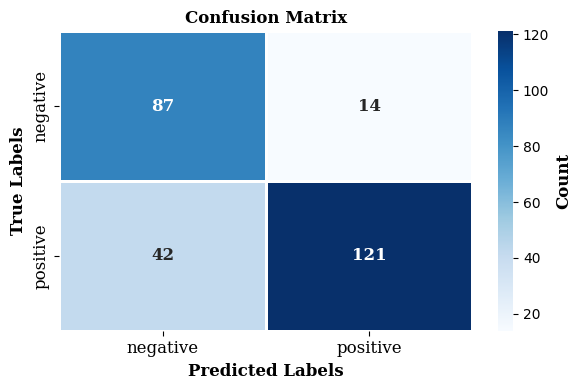

Accuracy: 0.787879
Precision: 0.811411
Recall: 0.787879
F1 Score: 0.790825
True Positive: 121
True Negative: 87
False Positive: 14
False Negative: 42
/content/mlruns/2/614943e2cc25491bb8e7916acea7c4d2/artifacts
Run ID: da2165e7a26745bf9ecf87672724e679


In [154]:
# Start an MLflow run
with mlflow.start_run(run_name="Heart Disease Classification using Logistic Regression") as run:
    # Define the parameters
    params = {
        'penalty': 'l2',
        'tol': 0.001,
        'C': 1.0,
        'fit_intercept': True,
        'class_weight': 'balanced',
        'max_iter': 150,
        'multi_class': 'auto'
    }

    mlflow.log_params(params)

    # Train the model
    logistic_regression_model = LogisticRegression(**params)
    logistic_regression_model.fit(X_train, y_train)
    predictions = logistic_regression_model.predict(X_test)

    # Save the model artifact for deployment
    mlflow.sklearn.log_model(logistic_regression_model, "logistic-regression-model-2")

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1score = f1_score(y_test, predictions, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))

    # Define custom font dictionary for title and labels
    font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

    # Create heatmap with annotations and colormap
    heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=2, linecolor='white',
                          xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'],
                          annot_kws={"family": "Serif", 'weight': 'bold', 'size': 12})

    # Set x and y labels with the custom font dictionary
    heatmap.set_xlabel('Predicted Labels', fontdict=font)
    heatmap.set_ylabel('True Labels', fontdict=font)
    heatmap.set_title('Confusion Matrix', fontdict=font)

    # Set font properties for tick labels on both axes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

    # Create a color bar to indicate the scale
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Count', fontdict=font)
    cbar.ax.tick_params(labelsize=10)

    # Adjust layout to prevent cropping
    plt.tight_layout()

    # Save the plot
    plt.savefig("confusion-matrix-logistic-regression.png")

    # Show the plot
    plt.show()

    # Calculate additional metrics from the confusion matrix
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    # Log metrics as a dictionary
    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1score': f1score,
        'true_positive': true_positive,
        'true_negative': true_negative,
        'false_positive': false_positive,
        'false_negative': false_negative
    }

    # Log metrics
    mlflow.log_metrics(metrics_dict)

    # Save the confusion matrix plot as an artifact
    mlflow.log_artifact(local_path="confusion-matrix-logistic-regression.png", artifact_path="confusion-matrix")

    # Print the metrics
    print("Accuracy: %f" % accuracy)
    print("Precision: %f" % precision)
    print("Recall: %f" % recall)
    print("F1 Score: %f" % f1score)
    print("True Positive: %d" % true_positive)
    print("True Negative: %d" % true_negative)
    print("False Positive: %d" % false_positive)
    print("False Negative: %d" % false_negative)

    # End the MLflow run
    run_id = run.info.run_uuid
    experiment_id = run.info.experiment_id
    mlflow.end_run()

    # Print run details
    print(mlflow.get_artifact_uri())
    print("Run ID: %s" % run_id)


### **2. Decision Tree Classifier Experiment** ✅

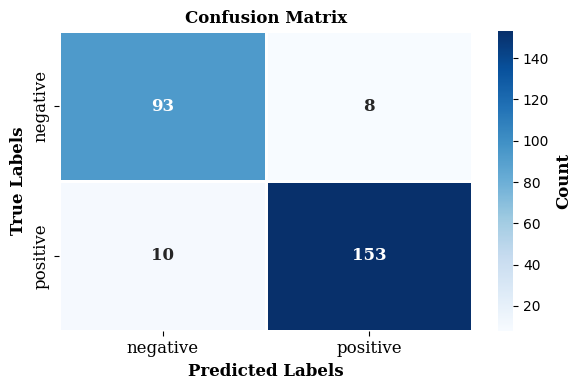

Accuracy: 0.931818
Precision: 0.932177
Recall: 0.931818
F1 Score: 0.931942
True Positive: 153
True Negative: 93
False Positive: 8
False Negative: 10
/content/mlruns/2/5b1687d3fdf74b528a5397a56332ef36/artifacts
Run ID: 6ce3262996374783a51e643c779a60ee


In [157]:
# Start an MLflow run
with mlflow.start_run(run_name="Heart Disease Classification using Decision Tree Classifier") as run:
    # Define the parameters
    params = {
        'criterion': 'gini',
        'splitter': 'best',
        'max_depth':30,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt'
    }

    mlflow.log_params(params)

    # Train the model
    DecisionTreeClassifier_model = DecisionTreeClassifier(**params)
    DecisionTreeClassifier_model.fit(X_train, y_train)
    predictions = DecisionTreeClassifier_model.predict(X_test)

    # Save the model artifact for deployment
    mlflow.sklearn.log_model(DecisionTreeClassifier_model, "DecisionTreeClassifier-model-1")

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1score = f1_score(y_test, predictions, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))

    # Define custom font dictionary for title and labels
    font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

    # Create heatmap with annotations and colormap
    heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=2, linecolor='white',
                          xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'],
                          annot_kws={"family": "Serif", 'weight': 'bold', 'size': 12})

    # Set x and y labels with the custom font dictionary
    heatmap.set_xlabel('Predicted Labels', fontdict=font)
    heatmap.set_ylabel('True Labels', fontdict=font)
    heatmap.set_title('Confusion Matrix', fontdict=font)

    # Set font properties for tick labels on both axes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

    # Create a color bar to indicate the scale
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Count', fontdict=font)
    cbar.ax.tick_params(labelsize=10)

    # Adjust layout to prevent cropping
    plt.tight_layout()

    # Save the plot
    plt.savefig("confusion-matrix-DecisionTreeClassifier.png")

    # Show the plot
    plt.show()

    # Calculate additional metrics from the confusion matrix
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    # Log metrics as a dictionary
    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1score': f1score,
        'true_positive': true_positive,
        'true_negative': true_negative,
        'false_positive': false_positive,
        'false_negative': false_negative
    }

    # Log metrics
    mlflow.log_metrics(metrics_dict)

    # Save the confusion matrix plot as an artifact
    mlflow.log_artifact(local_path="confusion-matrix-DecisionTreeClassifier.png", artifact_path="confusion-matrix")

    # Print the metrics
    print("Accuracy: %f" % accuracy)
    print("Precision: %f" % precision)
    print("Recall: %f" % recall)
    print("F1 Score: %f" % f1score)
    print("True Positive: %d" % true_positive)
    print("True Negative: %d" % true_negative)
    print("False Positive: %d" % false_positive)
    print("False Negative: %d" % false_negative)

    # End the MLflow run
    run_id = run.info.run_uuid
    experiment_id = run.info.experiment_id
    mlflow.end_run()

    # Print run details
    print(mlflow.get_artifact_uri())
    print("Run ID: %s" % run_id)


### **3. Random Forest Classifier Experiment** ✅

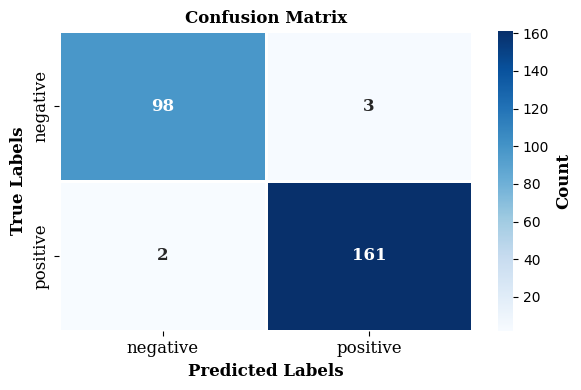

Accuracy: 0.981061
Precision: 0.981054
Recall: 0.981061
F1 Score: 0.981042
True Positive: 161
True Negative: 98
False Positive: 3
False Negative: 2
/content/mlruns/2/1bcc2254f9b448b2b7100025aba8f389/artifacts
Run ID: a539c489195f4f6b94881f3686f15506


In [156]:
# Start an MLflow run
with mlflow.start_run(run_name="Heart Disease Classification using Random Forest Classifier") as run:
    # Define the parameters
    params = {
        'n_estimators': 100,
        'criterion': 'gini',
        'max_depth': 10,
        'min_samples_split': 2,
        'min_samples_leaf': 1,
        'max_features': 'sqrt'
    }

    mlflow.log_params(params)

    # Train the model
    RandomForestClassifier_model = RandomForestClassifier(**params)
    RandomForestClassifier_model.fit(X_train, y_train)
    predictions = RandomForestClassifier_model.predict(X_test)

    # Save the model artifact for deployment
    mlflow.sklearn.log_model(RandomForestClassifier_model, "RandomForestClassifier-model-1")

    # Calculate classification metrics
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1score = f1_score(y_test, predictions, average='weighted')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_test, predictions)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))

    # Define custom font dictionary for title and labels
    font = {'family': 'Serif', 'weight': 'bold', 'size': 12}

    # Create heatmap with annotations and colormap
    heatmap = sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', linewidths=2, linecolor='white',
                          xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'],
                          annot_kws={"family": "Serif", 'weight': 'bold', 'size': 12})

    # Set x and y labels with the custom font dictionary
    heatmap.set_xlabel('Predicted Labels', fontdict=font)
    heatmap.set_ylabel('True Labels', fontdict=font)
    heatmap.set_title('Confusion Matrix', fontdict=font)

    # Set font properties for tick labels on both axes
    heatmap.set_xticklabels(heatmap.get_xticklabels(), fontname='Serif', fontsize=12)
    heatmap.set_yticklabels(heatmap.get_yticklabels(), fontname='Serif', fontsize=12)

    # Create a color bar to indicate the scale
    cbar = heatmap.collections[0].colorbar
    cbar.set_label('Count', fontdict=font)
    cbar.ax.tick_params(labelsize=10)

    # Adjust layout to prevent cropping
    plt.tight_layout()

    # Save the plot
    plt.savefig("confusion-matrix-RandomForestClassifier.png")

    # Show the plot
    plt.show()

    # Calculate additional metrics from the confusion matrix
    true_positive = conf_matrix[1, 1]
    true_negative = conf_matrix[0, 0]
    false_positive = conf_matrix[0, 1]
    false_negative = conf_matrix[1, 0]

    # Log metrics as a dictionary
    metrics_dict = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1score': f1score,
        'true_positive': true_positive,
        'true_negative': true_negative,
        'false_positive': false_positive,
        'false_negative': false_negative
    }

    # Log metrics
    mlflow.log_metrics(metrics_dict)

    # Save the confusion matrix plot as an artifact
    mlflow.log_artifact(local_path="confusion-matrix-RandomForestClassifier.png", artifact_path="confusion-matrix")

    # Print the metrics
    print("Accuracy: %f" % accuracy)
    print("Precision: %f" % precision)
    print("Recall: %f" % recall)
    print("F1 Score: %f" % f1score)
    print("True Positive: %d" % true_positive)
    print("True Negative: %d" % true_negative)
    print("False Positive: %d" % false_positive)
    print("False Negative: %d" % false_negative)

    # End the MLflow run
    run_id = run.info.run_uuid
    experiment_id = run.info.experiment_id
    mlflow.end_run()

    # Print run details
    print(mlflow.get_artifact_uri())
    print("Run ID: %s" % run_id)
